In [ ]:
# Task 1

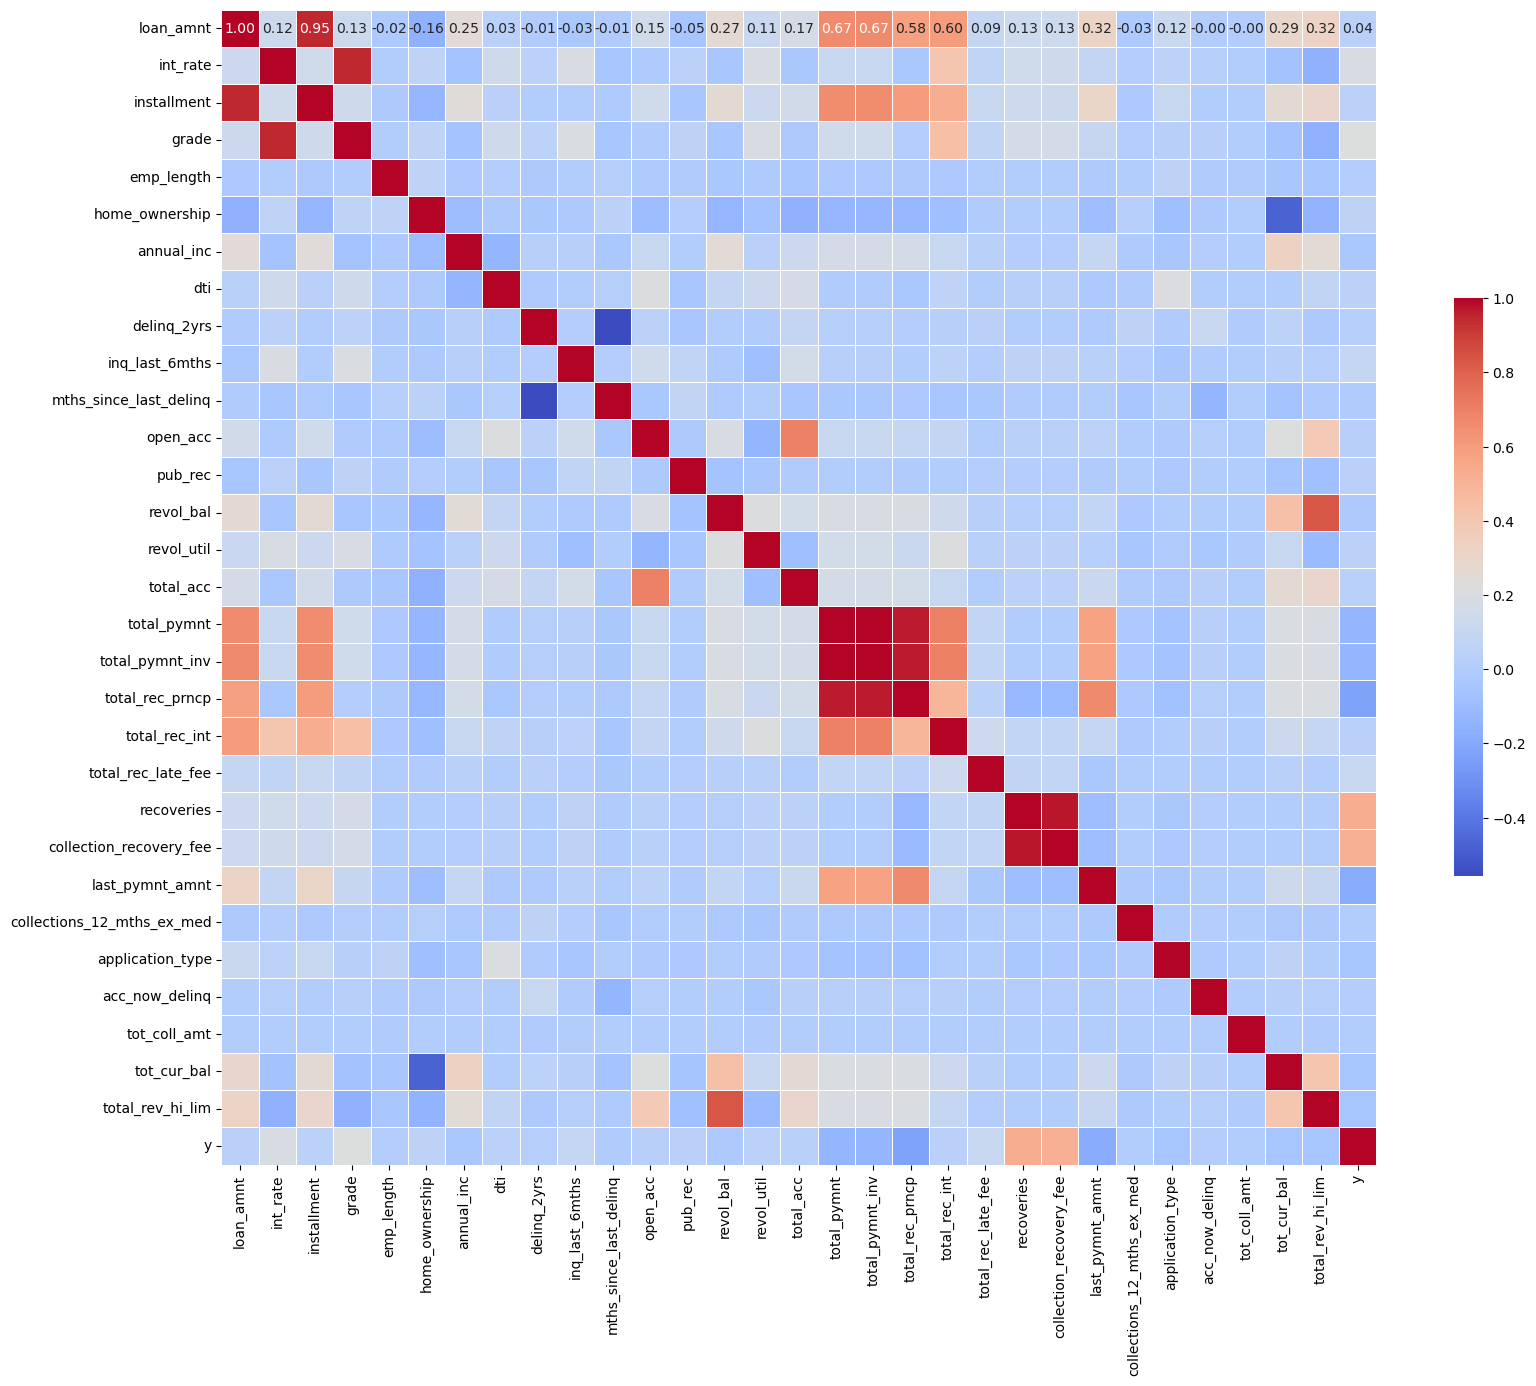

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

train_data = pd.read_csv("trainData.csv")
test_data = pd.read_csv("testData.csv")

train_data['y'] = (train_data['loan_status'] == "Charged Off").astype(int)
test_data['y'] = (test_data['loan_status'] == "Charged Off").astype(int)

train_data = train_data.drop(columns=['loan_status'])
test_data = test_data.drop(columns=['loan_status'])

train_data_preprocessed = train_data.drop(columns=['id', 'member_id'])
test_data_preprocessed = test_data.drop(columns=['id', 'member_id'])


train_data_preprocessed = train_data_preprocessed.dropna()
test_data_preprocessed = train_data_preprocessed.dropna()

# Encoding categorical variables using Label Encoder
label_encoder = LabelEncoder()
categorical_columns = ['grade', 'emp_length', 'home_ownership', 'application_type']

for column in categorical_columns:
    train_data_preprocessed[column] = label_encoder.fit_transform(train_data_preprocessed[column])
    
for column in categorical_columns:
    test_data_preprocessed[column] = label_encoder.fit_transform(test_data_preprocessed[column])


X_train = train_data_preprocessed.drop(columns=['y'])
y_train = train_data_preprocessed['y'].values

X_test = test_data_preprocessed.drop(columns=['y'])
y_test = test_data_preprocessed['y'].values


# Correlation Matrix
corr_matrix = train_data_preprocessed.corr(numeric_only=True)
plt.figure(figsize=(20, 15))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar_kws={'shrink': .5}, square=True, fmt='.2f', linewidths=.5)
plt.show()

In [3]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_train_lr = lr_model.predict(X_train)
y_pred_test_lr = lr_model.predict(X_test)
mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
mse_train_lr, mse_test_lr

(0.06850671108773985, 0.06850671108773985)

In [ ]:
# Ridge Regression Model
alphas = np.arange(0.01, 100, 0.01)
ridge_model = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_model.fit(X_train, y_train)
y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_test_ridge = ridge_model.predict(X_test)
mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
best_alpha_ridge = ridge_model.alpha_
mse_train_ridge, mse_test_ridge, best_alpha_ridge

In [ ]:
# Lasso Regression Model
lasso_model = LassoCV(alphas=alphas, cv=3)
lasso_model.fit(X_train, y_train)
y_pred_train_lasso = lasso_model.predict(X_train)
y_pred_test_lasso = lasso_model.predict(X_test)
mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)
mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)
best_alpha_lasso = lasso_model.alpha_
mse_train_lasso, mse_test_lasso, best_alpha_lasso

In [12]:
# Random Forest
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_train_rf = random_forest_model.predict(X_train)
y_pred_test_rf = random_forest_model.predict(X_test)
mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)
mse_train_rf, mse_test_rf

(0.00348722545987948, 0.00348722545987948)

In [ ]:
# Neural Network
neural_network_model = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', random_state=42)
neural_network_model.fit(X_train, y_train)
y_pred_train_nn = neural_network_model.predict(X_train)
y_pred_test_nn = neural_network_model.predict(X_test)
mse_train_nn = mean_squared_error(y_train, y_pred_train_nn)
mse_test_nn = mean_squared_error(y_test, y_pred_test_nn)
mse_train_nn, mse_test_nn

In [13]:
# Task 2
# Extract the correlations of all features with the target variable 'y'
corr_matrix = train_data_preprocessed.corr(numeric_only=True)
target_corr = corr_matrix['y'].sort_values()

# Display the 10 most positively correlated features
print("Top 10 positively correlated features with 'y':")
print(target_corr.drop('y').tail(10))  # Exclude the last one which is 'y' itself

# Display the 10 most negatively correlated (or least positively correlated) features
print("\nTop 10 negatively correlated features with 'y':")
print(target_corr.head(10))

Top 10 positively correlated features with 'y':
dti                        0.041488
installment                0.041655
revol_util                 0.043281
home_ownership             0.052045
inq_last_6mths             0.089825
total_rec_late_fee         0.101968
int_rate                   0.189353
grade                      0.216675
collection_recovery_fee    0.514246
recoveries                 0.529974
Name: y, dtype: float64

Top 10 negatively correlated features with 'y':
total_rec_prncp          -0.223023
last_pymnt_amnt          -0.181980
total_pymnt_inv          -0.132929
total_pymnt              -0.132924
tot_cur_bal              -0.049853
total_rev_hi_lim         -0.048218
application_type         -0.047288
annual_inc               -0.029821
revol_bal                -0.019584
mths_since_last_delinq   -0.008284
Name: y, dtype: float64
